In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('E:\github\DS-Olympus-\machineLearning\customerSegmentation\Dataset\Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.shape

(200, 5)

In [7]:
# check if any null values are present
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

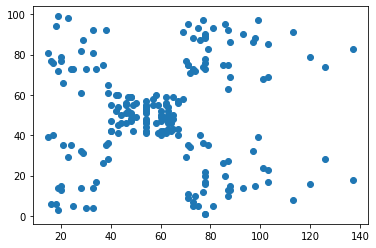

In [9]:
# scatter plot
plt.scatter(data['Annual_Income'],data['Spending_Score'])
plt.show()

In [10]:
# features
features = data[['Annual_Income','Spending_Score']]

In [11]:
# new_features
scaler = MinMaxScaler()
new_features = scaler.fit_transform(features)

In [12]:
print(features.head())
print(pd.DataFrame(new_features).head())

   Annual_Income  Spending_Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40
          0         1
0  0.000000  0.387755
1  0.000000  0.816327
2  0.008197  0.051020
3  0.008197  0.775510
4  0.016393  0.397959


In [13]:
# model
N = 5
model = KMeans(n_clusters = N)
result = model.fit_predict(features)
data['cluster'] = result
print(data)

     CustomerID  Gender  Age  Annual_Income  Spending_Score  cluster
0             1    Male   19             15              39        2
1             2    Male   21             15              81        3
2             3  Female   20             16               6        2
3             4  Female   23             16              77        3
4             5  Female   31             17              40        2
..          ...     ...  ...            ...             ...      ...
195         196  Female   35            120              79        1
196         197  Female   45            126              28        0
197         198    Male   32            126              74        1
198         199    Male   32            137              18        0
199         200    Male   30            137              83        1

[200 rows x 6 columns]


Text(0.5, 1.0, 'Final Clusters')

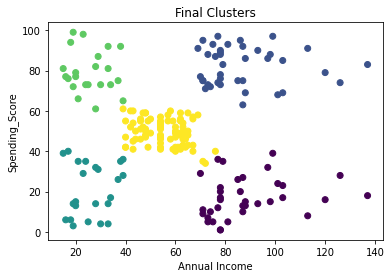

In [14]:
# final scatter
plt.scatter(data['Annual_Income'],data['Spending_Score'],c=data['cluster'])
plt.xlabel("Annual Income")
plt.ylabel("Spending_Score")
plt.title("Final Clusters")

In [15]:
# centroids
cr = model.cluster_centers_
print(cr)

cdf = pd.DataFrame(cr)
print(cdf)


[[88.2        17.11428571]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]]
           0          1
0  88.200000  17.114286
1  86.538462  82.128205
2  26.304348  20.913043
3  25.727273  79.363636
4  55.296296  49.518519


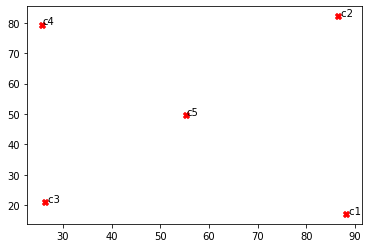

In [16]:
xlist = cdf[0].tolist()
ylist = cdf[1].tolist()
plt.scatter(xlist, ylist, color='red',marker="X")

num = [' c1',' c2',' c3','c4','c5']
for i ,txt in enumerate(num):
	plt.annotate(txt,(xlist[i],ylist[i]))

plt.show()

In [18]:
# predict
ai = float(input("Enter annual income: "))
ss = float(input("Enter spending score: "))
d = [[ai,ss]]
dt = scaler.transform(d)
print("Cluster: ",model.predict(dt))

Cluster:  [0]
